## Problem 3: Advanced Analysis
We have provided annotations over a larger portion of data from the same dataset (aggregate.csv). This dataset includes annotator ratings for Tone, Expertise, EncouragingDiscouraging, RespectfulDisrespectful, as well as the actual gender of the TED talk speaker.
Using these annotations, conduct an analysis that contrasts traits of comments addressed towards female and male speakers. You may analyze any one of the annotation traits (i.e. Respect), but justify your choice of trait.


In [90]:
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set_style("whitegrid")
sns.color_palette("Set2")



[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

In [91]:
agg = pd.read_csv("data/aggregate.csv")

agg.head()

,EncouragingDiscouraging,ExpertiseScale,PosterTone,RespectfulDisrespectful,gender,speakerhidden,talkid
0,Discouraging,None-STEM degree,Negative,Neutral,male,"<br>for those who are interested, penn &amp; t...",1829
1,Discouraging,No degree,None,Neutral,male,one time i saw a parrent yelling to his child ...,1917
2,Encouraging,STEM degree,Neutral,Neutral,female,"<br><span class=""highlighted"" data-timestamp=""...",1238
3,Encouraging,None-STEM degree,Positive,Respectful,male,beyond the tremendous positive change this may...,525
4,Encouraging,STEM degree,None,Neutral,male,"his notion that the ""media is the message"" mak...",1370


### Male vs female counts in data

Text(0.5, 1.0, 'Gender Counts')

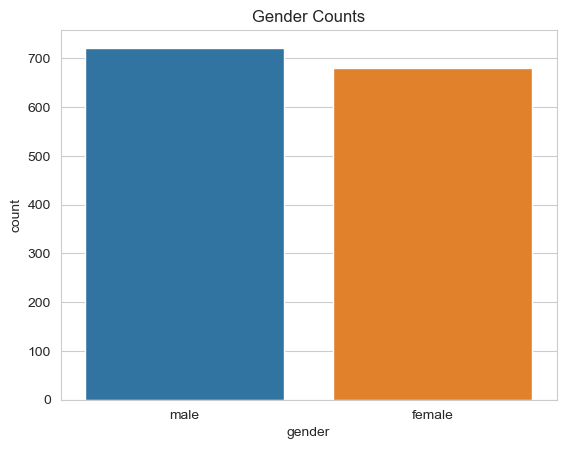

In [92]:
sns.countplot(data = agg, x = agg["gender"]).set_title("Gender Counts")

### Expertise colored by gender

([0, 1, 2],
 [Text(0, 0, 'None-STEM degree'),
  Text(1, 0, 'No degree'),
  Text(2, 0, 'STEM degree')])

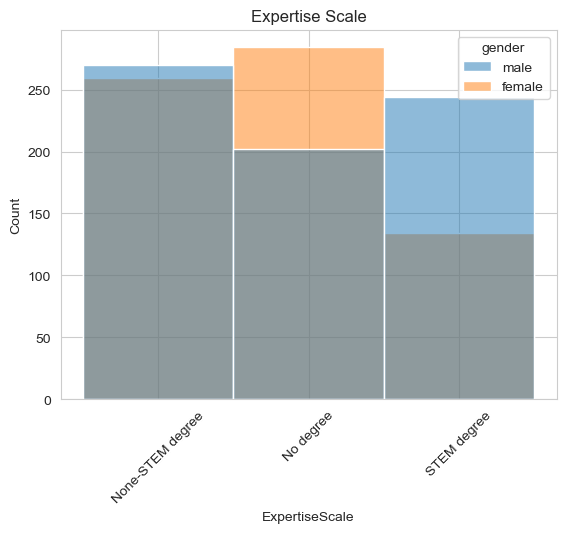

In [93]:
sns.histplot(agg, x = "ExpertiseScale", hue = "gender").set(title = "Expertise Scale")
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Negative'),
  Text(1, 0, 'None'),
  Text(2, 0, 'Neutral'),
  Text(3, 0, 'Positive'),
  Text(4, 0, 'Strongly Positive'),
  Text(5, 0, 'Strongly Negative')])

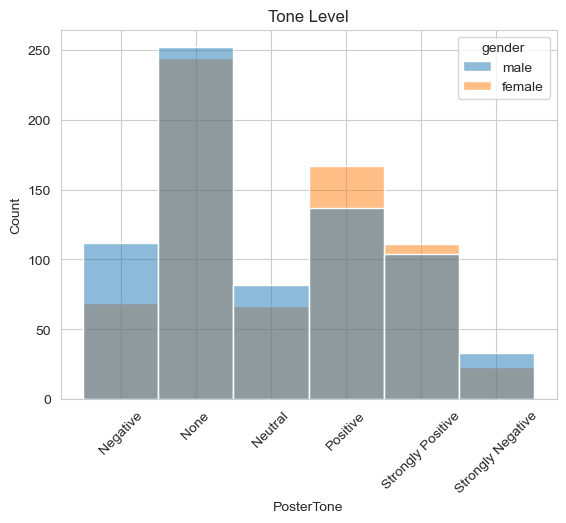

In [94]:
sns.histplot(agg, x = "PosterTone", hue = "gender").set(title = "Tone Level")
plt.xticks(rotation = 45)

([0, 1, 2],
 [Text(0, 0, 'Neutral'),
  Text(1, 0, 'Respectful'),
  Text(2, 0, 'Disrespectful')])

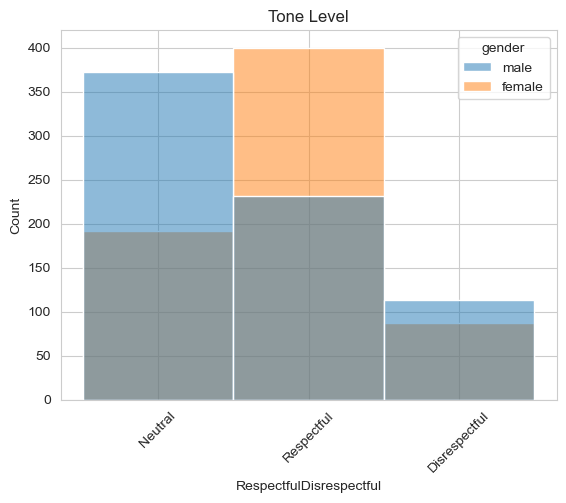

In [95]:
sns.histplot(agg, x = "RespectfulDisrespectful", hue = "gender").set(title = "Tone Level")
plt.xticks(rotation = 45)

([0, 1], [Text(0, 0, 'Discouraging'), Text(1, 0, 'Encouraging')])

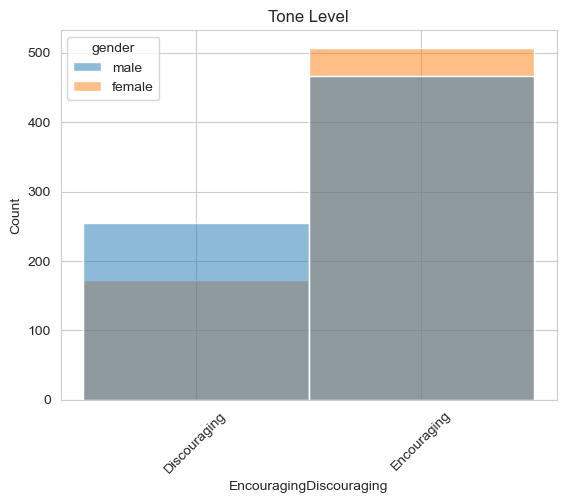

In [96]:
sns.histplot(agg, x = "EncouragingDiscouraging", hue = "gender").set(title = "Tone Level")
plt.xticks(rotation = 45)